# Taller 2

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller2.ipynb, con el primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en el binder del curso** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Jueves 4 de Mayo 11:59 pm**

## Librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.animation as ani
plt.style.use('dark_background')

In [3]:
from matplotlib import rc
rc("animation", html = "jshtml")

## Problema 1

En el github del curso encontrara un archivo de texto dow.txt. La información contiene el promedio de los precios en el mercado stocks de Estados Unidos de la empresa Dow Jones. \\

Escriba un programa que realice los siguientes pasos:



*    Lea los datos del archivo [dow.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/DataFiles/dow.txt). Use el siguiente comando para leer los datos
```
df = pandas.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/DataFiles/dow.txt")
```
*   Cálcule los coefficientes de la transformada de Fourier.
Asigne los ultimos $95\%$ de los coeficientes iguales a 0 (las frecuencias de menor amplitud). Es decir mantenga los primeros $10\%$ de los coeficientes y asigne el resto de coeficientes iguales a cero.
*   Calcule la transformada inversa de Fourier del arreglo del numeral anterior.
*   Gráfique el arreglo de numpy que resulta de la transformada inversa de Fourier y gráfique los datos originales encima. 

In [ ]:
# codigo para leer los datos no modificar

df = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/dow.txt")

data_reshaped = df.to_numpy().reshape(-1,).tolist()

In [ ]:

x=np.linspace(1,1023,1023).tolist()
def calculate_fourier_ck(data):
    C_klist = []
    for k in range(0,len(x)):
        c_k=0
        for m in range(0, len(data)):
            c_k+=(data[m]*np.exp((-2*np.pi*1j*m*k)/len(data)))
        C_klist.append(1/len(data)*c_k)
        
    return C_klist
def annihilate_low_freq(ck_list):
    copy=ck_list
    new_list = sorted(ck_list)
    limit=new_list[int((len(new_list)*0.9))]
    print(limit)
    w=0
    for i in range(len(copy)):
        if (np.abs(copy[i])<np.abs(limit)):
            copy[i]*=w
    return copy
def inverse_fourier(low_freq_list):
    inv_C_klist = []
    for k in range(0,len(x)):
        inv_c_k=0
        for m in range(0, len(low_freq_list)):
            inv_c_k+=low_freq_list[m]*(np.exp((2*np.pi*1j*m*k)/len(low_freq_list)))
        inv_C_klist.append(inv_c_k)
    return inv_C_klist
        
    
coef_list = calculate_fourier_ck(data_reshaped)
filtered_list= annihilate_low_freq(coef_list)
inv_list=inverse_fourier(filtered_list)
plt.plot(x,data_reshaped, color="r")
plt.plot(x,inv_list)



## Problema 2

En el github del curso encontrara un archivo de audio Thriller.wav. \\

Para leer el archivo este jupyter notebook debe estar en el directorio **Datafiles** del github. Es decir no modifique la forma de lectura del archivo.

Escriba un programa que realice los siguientes pasos:

*    Para leer los datos del archivo [Thriller.wav](https://github.com/diegour1/MetodosComputacionales2/blob/main/DataFiles/Thriller.wav). Use el siguiente comando para leer los datos
```
sr, x = wavfile.read("Thriller.wav")
```

Para leer el archivo, su notebook debe estar en la carpeta Datafiles en el github del curso.

In [4]:
# No modifique este codigo asi debe poder leerse su programa
sr, x = wavfile.read("Thriller.wav")
print(x[:, 0].shape)

(631919,)


In [42]:
# ejemplo para escuchar el audio no modificar
Audio(x[:, 0], rate=44100)

a) Realice un gráfico de las amplitudes de las frecuencias haciendo de la transformada de Fourier del audio.

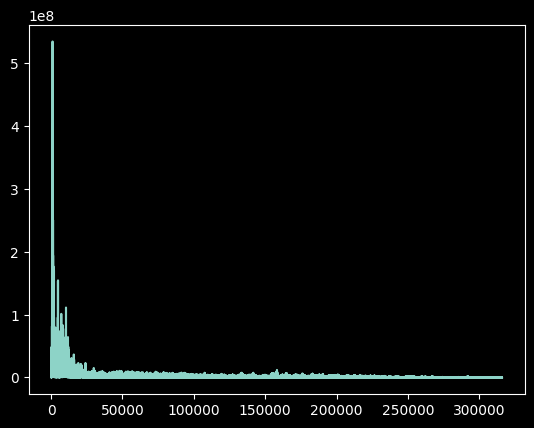

In [52]:
f=np.fft.rfft(x[:,0])
freq=np.abs(f)
plt.plot(freq)
Audio(f,rate=22050)


b) A partir del audio original elimine las 20000 frecuencias más bajas del audio y reproduzca el audio.

In [43]:
def filter_lows(data):
    N=data.shape[0]
    copy=data.copy()
    for n in range(copy.shape[0]):
        if (n<20000):
            copy[n]=0
    return copy

filtered_1 =filter_lows(f)
inv_filtered_1 = np.fft.ifft(filtered_1)

(315960,)
20000


In [49]:
Audio(inv_filtered_1, rate=22050)


c) A partir del audio original elimine las frecuencias más altas (las complementarias del 20000 más bajas) y reproduzca el audio. 

In [40]:
def filter_highs(data):
    N=data.shape[0]
    copy=data.copy()
    for n in range(copy.shape[0]):
        if (n>20000) and (n<N-20000):
            copy[n]=0
    return copy
filtered_2 =filter_highs(f)
inv_filtered_2 = np.fft.ifft(filtered_2)

In [50]:
Audio(inv_filtered_2, rate=22050)



## Problema 3

En este problema vamos a considerar el paquete de onda unidimensional Gaussiano, para una particula libre (potencial $0$), el paquete de onda está dado por, 

$$
  \psi(x, 0) = \Big[\frac{1}{\pi^{1/4}\sqrt{d}}\Big]\exp{\Big[ikx - \frac{x^2}{2d^2}\Big]}
$$

donde consideramos el tiempo igual a $0$. Para todo el ejercicio tome $ħ = 1$.

El paquete de onda se puede interpretar como una función de la posición $x$ tal que $P(x) = \psi(x, 0)\times\psi(x, 0)^*$ corresponde a la densidad de probabilidad de encontrar una particula en la posición $x$, y donde $\psi(x, 0)^*$ es el complejo conjugado de $\psi(x, 0)$.

Considere dos funciones de onda a partir de los archivos, [gauss_wave1.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt) y [gauss_wave2.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt).

Los archivos de las dos ondas se pueden leer con el comando, 

```
wave1 = pandas.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt")
```

Estos datos indican en la primera columna, la posición en $x$ y en la segunda columna el valor real de la función de onda y en la tercera columna el valor imaginario de la función de onda es decir la 2da y 3ra columna guardan $\psi(x)$. En el codigo a continuación se guarda las posiciones en las variables `x1` y `x2`, y las funciones de onda completas con parte real e imaginaria (número complejo) en` psi_x1` y `psi_x2`.



In [12]:
# codigo para leer los datos no modificar

wave1 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt", sep=" ").to_numpy()
wave2 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt", sep=" ").to_numpy()

x1, psi_x1 = wave1[:, 0], wave1[:, 1] + 1j* wave1[:, 2]
x2, psi_x2 = wave2[:, 0], wave2[:, 1] + 1j* wave2[:, 2]

x1.shape, psi_x1.shape, x2.shape, psi_x2.shape

((500,), (500,), (500,), (500,))

a) Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones, es decir, $x_1 \ \text{vs} \ P_1(x_1)$ y $x_2 \ \text{vs} \ P_2(x_2)$.


In [13]:
# su codigo aqui



b) El espacio de momentos $\phi(p)$ es una función tal que $ \ Q(p) = \phi(p)\times\phi(p)* \ $ corresponde a la probabilidad de que el momentum de una particula sea $p$. El espacio de momentos se puede obtener al realizar la transformada de Fourier del espacio de posiciones, 

$$
  \phi(p) = \frac{1}{\sqrt{2\piħ}}\int{\psi(x)\exp{(\frac{-ipx}{ħ})\,dx}}
$$

Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones de momentos, es decir, $p_1 \ \text{vs} \ Q_1(p_1)$ y $p_2 \ \text{vs} \ Q_2(p_2)$ entre $[-20, 20]$ con 500 puntos en $p$.

In [14]:
# su codigo aqui



c) Imprima los dos escalares que corresponden al valor esperado de los momentos para las dos funciones de onda.


In [15]:
### tu codigo aqui



d) Qué significa físicamente la relación entre el ancho de los gráficos de las partes a y b?

Su texto aquí

.

.

.

.

.

.

e) Realice una simulación mostrando la evolución temporal en el espacio de posiciones de la primera ecuación de onda $\psi_1(x)$ entre $[-20, 20]$.

La simulación debe generarse de forma automatica en el jupyter notebook en el binder del curso, y no debe demorar más de 30 segundos en generarse,

Para ello tome los siguientes parametros $t$ entre $[0, 10]$ con 100 puntos, y la simulación con $100$ frames.

Para asegurarse puede subir un link de youtube de su simulación. 

La simulación debería verse parecida al siguiente video.

.

Cambie por su link aquí

https://youtu.be/htkWqg9aG4c

.

.

In [16]:
### su codigo aqui



In [ ]:
plt.ylim([0,35000])
plt.xlim([0,0.5*pow(10,9)])